In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv('D:/dataset/lung_cancer_examples.csv',header=0)
# print(df)

In [119]:
X = df.values[:, : 5]
y = df.values[:, 5]
# print(X)
# print(y)

In [120]:
df.describe()

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.491525,42.355932,15.508475,5.474576,3.389831,0.474576,2.525424
std,0.504219,16.226588,9.171494,3.534831,2.456637,0.503640,0.503640
min,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,0.000000,29.000000,10.000000,3.000000,1.500000,0.000000,2.000000
50%,0.000000,39.000000,15.000000,5.000000,3.000000,0.000000,3.000000
75%,1.000000,55.000000,20.000000,7.500000,5.000000,1.000000,3.000000
max,1.000000,77.000000,51.000000,25.000000,9.000000,1.000000,3.000000


In [121]:
df.ndim

2

In [122]:
df.shape

(59, 7)

In [123]:
df.tail()

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
54,0,26,13,6,1,0,3
55,1,77,20,5,4,1,3
56,0,75,15,3,5,1,3
57,1,43,30,3,8,1,3
58,0,35,51,25,9,0,3


In [124]:
df.isnull().sum()

Gender    0
Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
sick      0
dtype: int64

In [125]:
df['Age'].value_counts()

62    4
28    3
35    3
33    3
26    3
34    3
39    2
21    2
47    2
25    2
77    2
55    2
44    2
37    2
42    2
22    2
50    1
68    1
52    1
53    1
56    1
58    1
59    1
45    1
36    1
43    1
40    1
69    1
31    1
30    1
27    1
19    1
18    1
75    1
73    1
63    1
Name: Age, dtype: int64

In [126]:
df['sick'].value_counts()

3    31
2    28
Name: sick, dtype: int64

In [84]:
df['Gender'].value_counts()

0    30
1    29
Name: Gender, dtype: int64

In [85]:
df.head()

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
0,0,35,3,5,4,1,2
1,1,27,20,2,5,1,2
2,0,30,0,5,2,0,2
3,1,28,0,8,1,0,2
4,0,68,4,5,6,1,2


In [86]:
df['Smokes'].value_counts().sum()

59

In [87]:
df['Alkhol'].value_counts().sum()

59

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  59 non-null     int64
 1   Age     59 non-null     int64
 2   Smokes  59 non-null     int64
 3   AreaQ   59 non-null     int64
 4   Alkhol  59 non-null     int64
 5   Result  59 non-null     int64
 6   sick    59 non-null     int64
dtypes: int64(7)
memory usage: 3.4 KB


In [127]:
df.drop_duplicates()

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
0,0,35,3,5,4,1,2
1,1,27,20,2,5,1,2
2,0,30,0,5,2,0,2
3,1,28,0,8,1,0,2
4,0,68,4,5,6,1,2
5,1,34,0,10,0,0,2
6,0,58,15,10,0,0,2
7,1,22,12,5,2,0,2
8,0,45,2,6,0,0,2
9,1,52,18,4,5,1,2


In [90]:
df.corr()

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
Gender,1.000000,-0.114473,0.027046,-0.007378,-0.059923,-0.051784,-0.016110
Age,-0.114473,1.000000,0.006177,-0.241064,0.302682,0.654085,0.191913
Smokes,0.027046,0.006177,1.000000,0.140274,0.576450,0.279060,0.501055
AreaQ,-0.007378,-0.241064,0.140274,1.000000,-0.236102,-0.593553,-0.055317
Alkhol,-0.059923,0.302682,0.576450,-0.236102,1.000000,0.725808,0.235716
Result,-0.051784,0.654085,0.279060,-0.593553,0.725808,1.000000,0.155530
sick,-0.016110,0.191913,0.501055,-0.055317,0.235716,0.155530,1.000000


In [91]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
dtype: bool

In [92]:
df.dropna()

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
0,0,35,3,5,4,1,2
1,1,27,20,2,5,1,2
2,0,30,0,5,2,0,2
3,1,28,0,8,1,0,2
4,0,68,4,5,6,1,2
5,1,34,0,10,0,0,2
6,0,58,15,10,0,0,2
7,1,22,12,5,2,0,2
8,0,45,2,6,0,0,2
9,1,52,18,4,5,1,2


In [93]:
df.fillna

<bound method DataFrame.fillna of     Gender  Age  Smokes  AreaQ  Alkhol  Result  sick
0        0   35       3      5       4       1     2
1        1   27      20      2       5       1     2
2        0   30       0      5       2       0     2
3        1   28       0      8       1       0     2
4        0   68       4      5       6       1     2
5        1   34       0     10       0       0     2
6        0   58      15     10       0       0     2
7        1   22      12      5       2       0     2
8        0   45       2      6       0       0     2
9        1   52      18      4       5       1     2
10       0   33       4      8       0       0     2
11       1   18      10      6       3       0     2
12       0   25       2      5       1       0     2
13       1   28      20      2       8       1     2
14       0   34      25      4       8       1     2
15       1   39      18      8       1       0     2
16       0   42      22      3       5       1     2
17       1  

In [98]:
pd.get_dummies(df)

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
0,0,35,3,5,4,1,2
1,1,27,20,2,5,1,2
2,0,30,0,5,2,0,2
3,1,28,0,8,1,0,2
4,0,68,4,5,6,1,2
5,1,34,0,10,0,0,2
6,0,58,15,10,0,0,2
7,1,22,12,5,2,0,2
8,0,45,2,6,0,0,2
9,1,52,18,4,5,1,2


In [99]:
X =df.drop(columns='sick',axis=1)
y = df['sick'] 

In [100]:
X

,Gender,Age,Smokes,AreaQ,Alkhol,Result
0,0,35,3,5,4,1
1,1,27,20,2,5,1
2,0,30,0,5,2,0
3,1,28,0,8,1,0
4,0,68,4,5,6,1
5,1,34,0,10,0,0
6,0,58,15,10,0,0
7,1,22,12,5,2,0
8,0,45,2,6,0,0
9,1,52,18,4,5,1


In [101]:
y

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
Name: sick, dtype: int64

In [103]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Gender,Age,Smokes,AreaQ,Alkhol,Result,sick
0,0,35,3,5,4,1,2
1,1,27,20,2,5,1,2
2,0,30,0,5,2,0,2
3,1,28,0,8,1,0,2
4,0,68,4,5,6,1,2


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)                                                                           

In [105]:
print(X.shape, X_train.shape,X_test.shape)

(59, 6) (41, 6) (18, 6)


In [106]:
male =0
femal =1
if male > femal:
    print("Lung cancer is more common in men than women")
elif male == femal:
    print("Lung cancer is equal in men and women")
else:
    print("Lung cancer is more common in men than bread")

Lung cancer is more common in men than bread


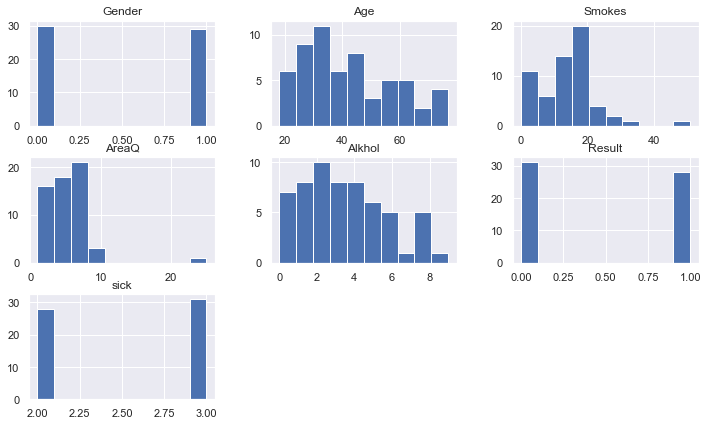

In [107]:
df.hist(figsize=(12, 12),layout=(5, 3));

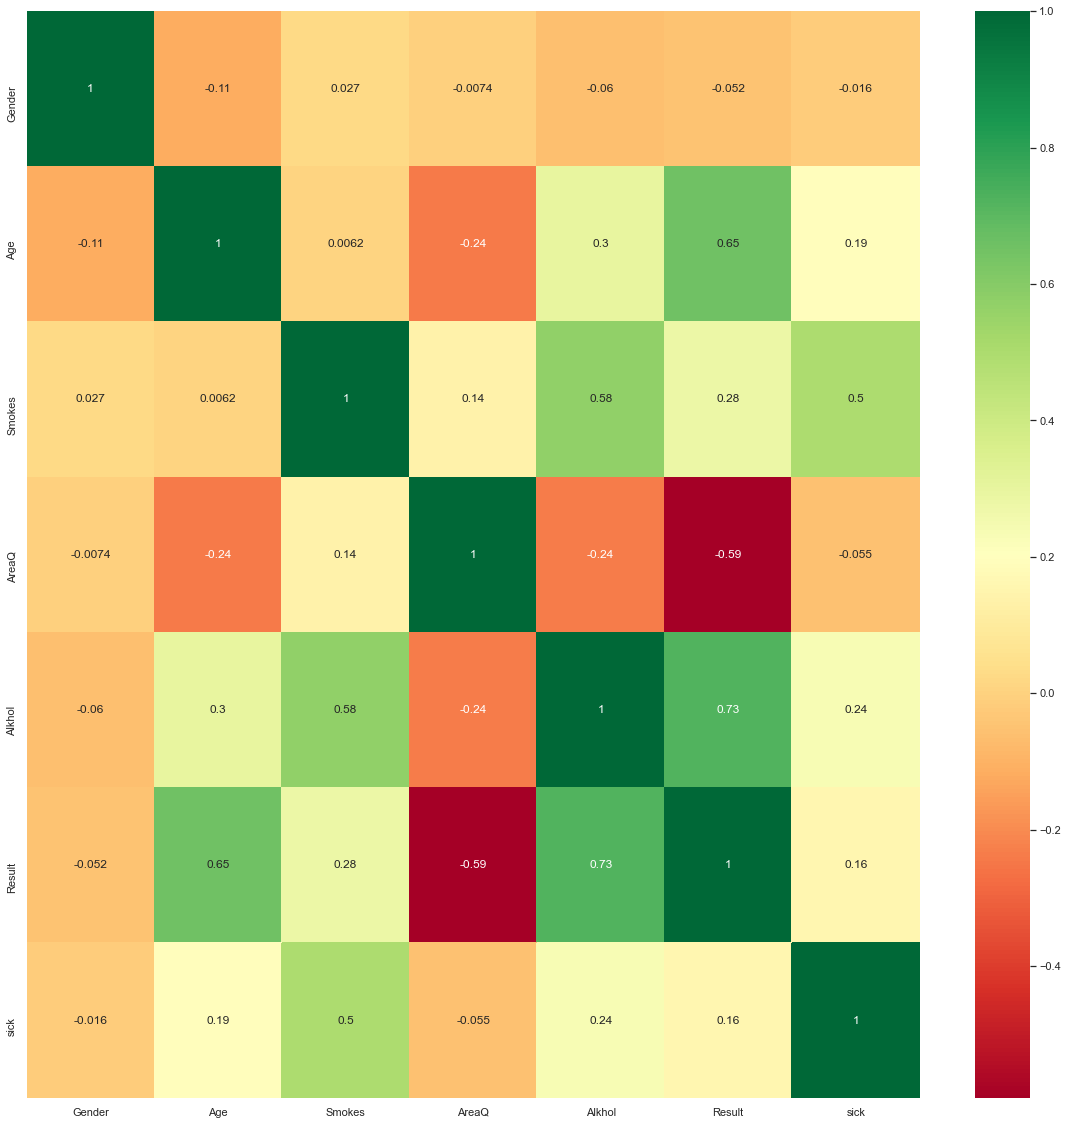

In [108]:
corrmat = df.corr()
# plot heat map
top_corr_features=corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

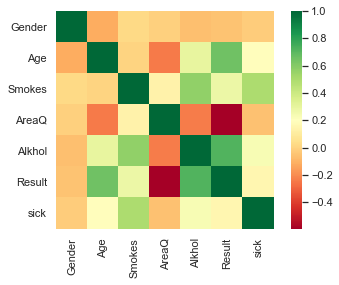

In [109]:
sns.heatmap(df.corr(),square=True,cmap="RdYlGn");

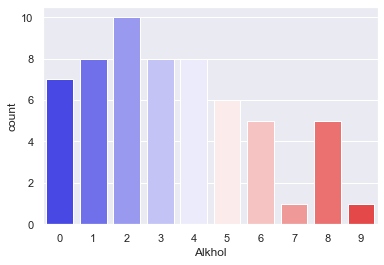

In [110]:
sns.countplot(x="Alkhol", data=df, palette="bwr")
plt.show()

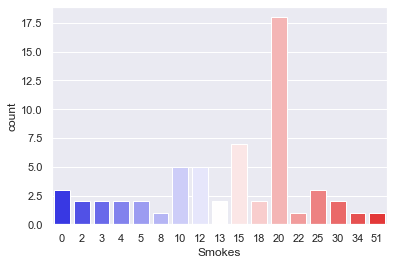

In [111]:
sns.countplot(x="Smokes", data=df, palette="bwr")
plt.show()

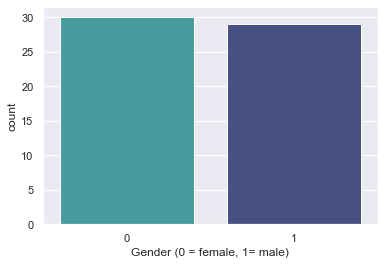

In [112]:
sns.countplot(x='Gender', data=df, palette="mako_r")
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

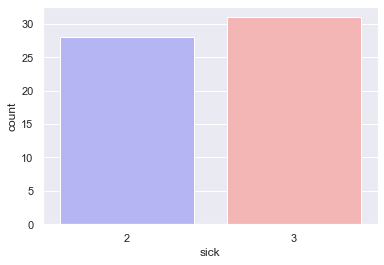

In [113]:
sns.countplot(x="sick", data=df, palette="bwr")
plt.show()

In [114]:
model = DecisionTreeClassifier(random_state=42)

In [115]:
model = DecisionTreeClassifier(
    criterion="entropy",
    splitter='best',
    max_depth=2,
    min_samples_split=0.2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.2,
    max_features="log2",
    random_state=42,
    max_leaf_nodes=3,
    min_impurity_decrease=0.2,
    min_impurity_split=0.2,
    class_weight="balanced",
    ccp_alpha=0.15,)


model.fit(X_train, y_train)
model_predict= model.predict(X_test)
model.score(X_train,y_train)


0.43902439024390244

In [116]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)



mlp=MLPClassifier(
    hidden_layer_sizes=(100,100),
    activation='relu',
    solver='sgd',
    alpha=0.0001,
    batch_size=256,
    learning_rate='adaptive',
    learning_rate_init= 0.0001,
    power_t=0.9,
    max_iter=300,
    shuffle=True,
    random_state=42,
    tol=1e-6,
    verbose=0,
    warm_start=bool,
    momentum=0.10,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.2,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=16000,
)
clf = MLPClassifier(hidden_layer_sizes=(100, 100), verbose=True, max_iter=300)
mlp.fit(X_train, y_train)

#In this way, you can check the function and itration
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

X_test_prediction = model.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction,y_test)
print('Accuracy Test Precision  data : ',test_data_accuracy)

Iteration 1, loss = 5.33921332
Iteration 2, loss = 4.49271066
Iteration 3, loss = 3.64407766
Iteration 4, loss = 2.80021458
Iteration 5, loss = 1.98855607
Iteration 6, loss = 1.33071403
Iteration 7, loss = 1.04878240
Iteration 8, loss = 1.33292370
Iteration 9, loss = 1.68050404
Iteration 10, loss = 1.75030700
Iteration 11, loss = 1.58394068
Iteration 12, loss = 1.27363247
Iteration 13, loss = 0.94356421
Iteration 14, loss = 0.73165929
Iteration 15, loss = 0.71288696
Iteration 16, loss = 0.81121094
Iteration 17, loss = 0.91566844
Iteration 18, loss = 0.97153995
Iteration 19, loss = 0.96372440
Iteration 20, loss = 0.89882217
Iteration 21, loss = 0.79837867
Iteration 22, loss = 0.69359689
Iteration 23, loss = 0.62389437
Iteration 24, loss = 0.61646516
Iteration 25, loss = 0.66004493
Iteration 26, loss = 0.71162678
Iteration 27, loss = 0.73242924
Iteration 28, loss = 0.71057256
Iteration 29, loss = 0.65877538
Iteration 30, loss = 0.60360715
Iteration 31, loss = 0.57037833
Iteration 32, los